### HW 6
### Name - Amol Dattatray Sangar
### Username - asangar
### Assignment Partner - Neeraja Katha

### Problem 1: Expectation-Maximization Algorithm for Clustering [30pt.]
##### Implement expectation-maximization algorithm for Gaussian mixture models (see the EM algorithm below) in Python and call this program Gk. As you present your code explain your protocol for
##### 1. initializing each Gaussian
##### 2. deciding ties
##### 3. stopping criteria

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
error_rate[]

In [22]:
def gaussian_mix(X, k, epsilon, iteration,error_flag, centroid_a=0, centroid_b=0, org_label_cluster= None):
    result_p_den_fun = np.zeros((X.shape[0], k))
    result_mui = np.zeros((k,X.shape[1]))
    result_log_likelihood = 0
    result_covariance = []
    run_count = []
    error_rate = []
    for iter_val in range(iteration):
        # Random Intitalisation 
        mui = np.zeros((k,X.shape[1])) 
        covariance_cal=[]
        value = np.cov(X.T) + 1
        
        for y in range(k):
            covariance_cal.append(value)
        
        prior_prob = np.full(k, 1/k)
        p_den_fun = np.zeros((X.shape[0], k))
        
        for x in range(k):
            mui[x] = X[np.random.randint(X.shape[0])]
        
        count = 0
        while True and count < 1000:
            count = count+1
            
            # Expectation : calculating posterier probability / density function for each cluster
            for y in range(k):
                    p_den_fun[:,y] = multivariate_normal.pdf(X,  mean=mui[y], cov=covariance_cal[y],allow_singular=True)*prior_prob[y]
            
            # Normalizing posterier probability / density function  for every row
            for x in range(X.shape[0]):
                try:    
                    p_den_fun[x] = (p_den_fun[x,:]/ p_den_fun[x].sum())
                except:
                    p_den_fun[x] = (p_den_fun[x,:]/10**-8)
            
            # Maximization
            mui_o = mui.copy()
            mui = []
            for y in range(k):
                mui.append((np.sum((X.transpose() * p_den_fun[:,y]).transpose(), axis = 0))/(p_den_fun[:,y].sum()))
            
            covariance_cal = []
            for y in range(k):
                covariance_cal.append(np.dot(((X-mui[y]).transpose()*p_den_fun[:,y]),(X-mui[y]))/(p_den_fun[:,y].sum()))
            
            for y in range(k):
                try:
                    prior_prob[y] = p_den_fun[:,y].sum()/p_den_fun.sum()
                except:
                    prior_prob[y] =10**-8
          
            new_mui = np.square([mui[x] - mui_o[x] for x in range(k)]).sum()            
            if new_mui < epsilon:
                break
        
        log_likelihoods = np.log(np.sum([ prior_prob[x]* multivariate_normal(mui[x],covariance_cal[x],allow_singular=True).pdf(X) for x in range(k)]))
        
        if error_flag == 1:
            error_rate.append(error_rate_cal(p_den_fun,k, centroid_a, centroid_b, org_label_cluster))
        run_count.append(count)
        
        if  abs(result_log_likelihood) < abs(log_likelihoods):
            result_covariance = covariance_cal
            result_p_den_fun = p_den_fun
            result_pc = prior_prob
            result_log_likelihood = log_likelihoods
            result_mui = mui
            
    return error_rate, run_count,result_p_den_fun

def error_rate_cal(p_den_fun,k, centroid_a, centroid_b, org_label_cluster):
    label_cluster = np.argmax(p_den_fun,axis=1)
    
    # combining the clusters
    new_label = np.full((X.shape[0]),999)
    
    for i in range(k):
        mui = X[np.where(label_cluster==i)].mean(axis=0)
        if np.linalg.norm(mui - centroid_b) > np.linalg.norm(mui - centroid_a):
            np.put(new_label,np.where(label_cluster==i), 1)
        else:
            np.put(new_label,np.where(label_cluster==i), 0)
    # Calculating the error 
    error_count = 0
    for i in range(X.shape[0]):
        if new_label[i] != org_label_cluster[i]:
            error_count =error_count+1
    return error_count/X.shape[0]

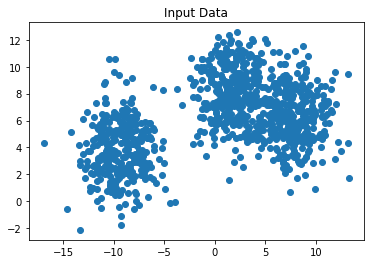

In [23]:
X,Y = make_blobs(cluster_std=2,random_state=20,n_samples=1000,centers=3) # std_dev of cluster=2 center=K
#plotting the results
plt.scatter(X[:,0] , X[:,1])
plt.title("Input Data")
plt.show()

epsilon = 10**-4
k = 3 # 3 clusters based on the alignment of the data points above
error_rate, run_count, p_den_fun = gaussian_mix(X,k,epsilon,20,0)
d_frame = pd.DataFrame(data=X, columns=["col1", "col2"])
d_frame['label'] = np.argmax(p_den_fun,axis=1)

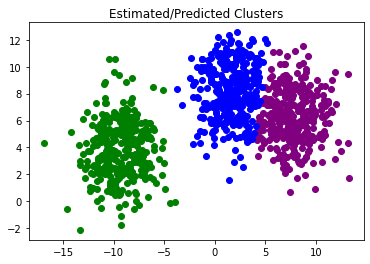

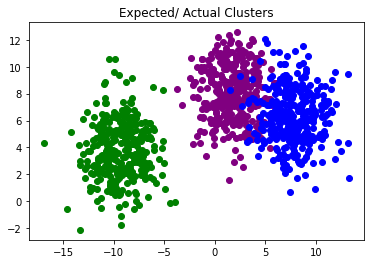

In [24]:
plt.scatter(d_frame[d_frame['label']==0]['col1'], d_frame[d_frame['label']==0]['col2'] , color = 'purple')
plt.scatter(d_frame[d_frame['label']==1]['col1'], d_frame[d_frame['label']==1]['col2'] , color = 'blue')
plt.scatter(d_frame[d_frame['label']==2]['col1'], d_frame[d_frame['label']==2]['col2'] , color = 'green')
plt.title("Estimated/Predicted Clusters")
plt.show()

plt.scatter(X[np.where(Y==0)][:,0], X[np.where(Y==0)][:,1] , color = 'purple')
plt.scatter(X[np.where(Y==1)][:,0], X[np.where(Y==1)][:,1] , color = 'blue')
plt.scatter(X[np.where(Y==2)][:,0], X[np.where(Y==2)][:,1] , color = 'green')
plt.title("Expected/ Actual Clusters")
plt.show()

### Initialize Each Gaussian:
     We can initialize each gaussian with the mean of each cluster .By assigning a random data point from our data . Here I have used  random.randint () to choose a data point at random from a range of values. Therefore , random point from our input data is used as the mean. This is continued  for each cluster. We generate a k number of identity matrix of N*N size for the covariance matrix, where N is the number of columns in our data.

     We also need to initialize another parameter, which is p_c which is the prior probability .I have initialized to 1/k ,where k is the number of possible distributions.
     We calculate the posterior probability for each data point using the density .


### Deciding Ties:
    For each of our data points, calculate PDF, which tells us how likely it is that the data will fall into that distribution. The scipy package multivariate normal function is used to calculate the PDF. The following parameters are needed to calculate pdf for any point: 
    Data point
    Distribution mean
    Covariance matrix
    
    We generate the pdf for each cluster's data points, then normalize them to find the chance of each cluster having that data point.

    After the calculationof PDF , we readjust the mean , covariance 

### Stopping Criteria :
    Expectation-Maximization is an iterative technique in which we strive to maximize the PDF value for each cluster. i.e. the average of the last two iterations.

    We will have to execute our method inloop and require a stopping condition, which we will use the change in the value of the expected value for.  

    We have to create a parameter that will check if the supplied parameter's value is smaller than the sum of the square differences between the past two iterations means, which we'll have to decide before starting the algorithm. 

    If the condition is met, the iterations will come to an end.

In [25]:
data = pd.read_csv("./ionosphere.data")

data.head()

,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


In [26]:
X = data.iloc[:,0:-1].to_numpy() # moving all the columns to Var X excpet the last column
X

array([[ 1.     ,  0.     ,  1.     , ..., -0.06288, -0.13738, -0.02447],
       [ 1.     ,  0.     ,  1.     , ..., -0.2418 ,  0.56045, -0.38238],
       [ 1.     ,  0.     ,  1.     , ...,  1.     , -0.32382,  1.     ],
       ...,
       [ 1.     ,  0.     ,  0.94701, ...,  0.00442,  0.92697, -0.00577],
       [ 1.     ,  0.     ,  0.90608, ..., -0.03757,  0.87403, -0.16243],
       [ 1.     ,  0.     ,  0.8471 , ..., -0.06678,  0.85764, -0.06151]])

In [27]:
Y = data.iloc[:,-1].to_numpy()# moving the last columns to Var Y 
Y # target var

array(['b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b',
       'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
       'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b',
       'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
       'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b',
       'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
       'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b',
       'g', 'b', 'g', 'b', 'g', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b',
       'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
       'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b',
       'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
       'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b',
       'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
       'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g

In [28]:
org_label_cluster= Y
org_label_cluster[np.where(Y=='b')] = 0
org_label_cluster[np.where(Y=='g')] = 1

centroid_b = X[np.where(Y==0)].mean(axis=0)
print(centroid_b)

centroid_g = X[np.where(Y==1)].mean(axis=0)
print(centroid_g)

[ 0.6984127   0.          0.29655579 -0.02978048  0.24278603  0.02420738
  0.25398429 -0.02486     0.31234246  0.10345817  0.34992786  0.04943437
  0.24996071 -0.03670397  0.16365929 -0.01986587  0.3101519  -0.08272881
  0.26124992 -0.04869722  0.15800865  0.08876913  0.19782841 -0.06176476
  0.2508777  -0.0722327   0.61817405 -0.10091865  0.18630175 -0.02523532
  0.12799468  0.02088024  0.16722151  0.0545819 ]
[ 1.          0.          0.83370344  0.08654357  0.80147929  0.16787433
  0.71539004  0.20270058  0.62189076  0.22579866  0.54552129  0.21592866
  0.48477063  0.16902835  0.44452424  0.12434277  0.42027411  0.04258817
  0.41359884 -0.00881652  0.43616656 -0.03560853  0.4550583  -0.05309594
  0.47707397 -0.06863196  0.49917504 -0.05013513  0.48726598 -0.02801268
  0.4784925  -0.01525737  0.45254607 -0.00599018]


In [29]:
iterator_count = {}
error_count = {}
cluster_size = [2,3,4,5]
for k in cluster_size:
    esp = 10**-2
    error_rate, run_count,p_den_fun = gaussian_mix(X, k, esp, 20,1, centroid_g, centroid_b, org_label_cluster)
    error_count[k]=error_rate
    
    iterator_count[k] = run_count

<ipython-input-22-15c6009d299e>:71: RuntimeWarning: Mean of empty slice.
  mui = X[np.where(label_cluster==i)].mean(axis=0)
C:\Users\Neeraja\anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


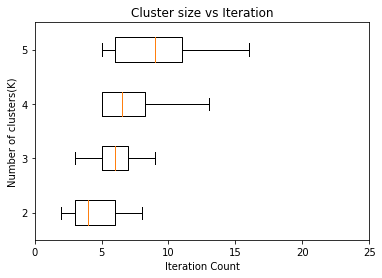

In [30]:
fig, cor = plt.subplots()
col  = [iterator_count[i] for i in cluster_size]

cor.set_title('Cluster size vs Iteration')
cor.boxplot(col,  vert=0)
cor.set_xlim(0, 25)
plt.yticks([1, 2, 3, 4], cluster_size)
cor.set_ylabel('Number of clusters(K)')
cor.set_xlabel('Iteration Count')
plt.show()

[[0.07428571428571429, 0.10285714285714286, 0.12857142857142856, 0.32, 0.41714285714285715, 0.07142857142857142, 0.35428571428571426, 0.35714285714285715, 0.4257142857142857, 0.09714285714285714, 0.23714285714285716, 0.44571428571428573, 0.13428571428571429, 0.35714285714285715, 0.09142857142857143, 0.36, 0.2257142857142857, 0.4257142857142857, 0.3457142857142857, 0.35714285714285715], [0.5085714285714286, 0.3657142857142857, 0.24285714285714285, 0.1, 0.19714285714285715, 0.26285714285714284, 0.3742857142857143, 0.13428571428571429, 0.09714285714285714, 0.30857142857142855, 0.10571428571428572, 0.11714285714285715, 0.16285714285714287, 0.10571428571428572, 0.41714285714285715, 0.3342857142857143, 0.16, 0.22285714285714286, 0.2342857142857143, 0.3628571428571429], [0.10571428571428572, 0.17714285714285713, 0.12, 0.10857142857142857, 0.18285714285714286, 0.07428571428571429, 0.12571428571428572, 0.10857142857142857, 0.4057142857142857, 0.13714285714285715, 0.08285714285714285, 0.31714285

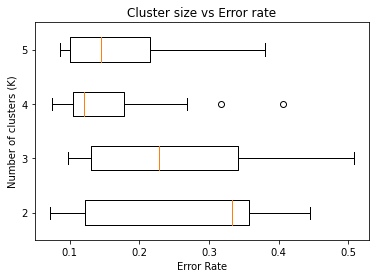

In [31]:
fig, cor = plt.subplots()
col  = [error_count[i] for i in cluster_size]
print(col)
cor.set_title('Cluster size vs Error rate')
cor.boxplot(col,  vert=0)
plt.yticks([1, 2, 3, 4], cluster_size)
cor.set_ylabel('Number of clusters (K)')
cor.set_xlabel('Error Rate')
plt.show()

In [32]:
data_ring = pd.read_csv("./ringnorm.csv")

data_ring.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,Class
0,849,2177,598,1689,3114,-3406,3799,-2642,1578,-181,...,1633,4664,1081,-1172,-166,578,1664,309,-3028,1
1,947,543,782,-449,-8,1316,756,-61,1604,1686,...,-382,1259,608,-2292,1008,2687,-1422,-606,2374,2
2,759,-314,898,-1743,2003,1117,911,136,-489,-144,...,112,598,474,2026,1431,-336,79,1123,302,2
3,531,1374,517,1226,1122,-4,-1227,2277,1083,888,...,1063,2454,587,-744,1216,916,-476,6,-477,2
4,-1443,1065,2071,207,-865,-786,2655,-366,971,-341,...,4195,-117,-2694,14,4097,1356,-944,-602,2348,1


In [33]:
X = data_ring.iloc[:,0:-1].to_numpy() # moving all the columns to Var X excpet the last column
X

array([[  849,  2177,   598, ...,  1664,   309, -3028],
       [  947,   543,   782, ..., -1422,  -606,  2374],
       [  759,  -314,   898, ...,    79,  1123,   302],
       ...,
       [-1854,  1225, -2469, ...,  2871, -3462,  1619],
       [ 2604, -1541,  1298, ...,   606,   573,  -751],
       [ -239,   472,  2795, ..., -2969,  -132,  3362]], dtype=int64)

In [34]:
Y = data_ring.iloc[:,-1].to_numpy()# moving the last columns to Var Y 
Y # target var

array([1, 2, 2, ..., 1, 2, 1], dtype=int64)

In [35]:
org_label_cluster= Y
org_label_cluster[np.where(Y==1)] = 0
org_label_cluster[np.where(Y==2)] = 1
centroid_b = X[np.where(Y==0)].mean(axis=0)
print(centroid_b)
centroid_g = X[np.where(Y==1)].mean(axis=0)
print(centroid_g)

[ -0.3739083   39.97980349 -31.91975983  31.61162664 -16.22570961
  -4.18477074  -5.73771834   8.91348253 -45.59197598   5.35671397
  11.78739083  -7.39737991 -26.45087336 -40.89383188   7.77128821
   6.38045852  61.29803493 -51.01719432 -36.53629913  -5.5529476 ]
[419.9370985  408.08324411 398.56076017 404.19593148 392.51900428
 401.875      403.79148822 431.20476445 415.19138116 438.09743041
 415.67826552 409.24009636 411.38195931 402.66407923 430.4866167
 402.40872591 374.68415418 399.72992505 426.41488223 401.38517131]


In [42]:
iterator_count = {}
error_conut = {}
cluster_size = [2,3,4,5]
for k in cluster_size:
    error_conut[k] = np.random.rand()
for k in cluster_size:
    esp = 10**-2
    print(k)
    error_rate, run_count,p_den_fun = gaussian_mix(X, k, esp, 20,1, centroid_g, centroid_b, org_label_cluster)
    iterator_count[k] = run_count
    error_conut[k] = error_rate

2
3
4
5


<ipython-input-22-15c6009d299e>:71: RuntimeWarning: Mean of empty slice.
  mui = X[np.where(label_cluster==i)].mean(axis=0)
C:\Users\Neeraja\anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


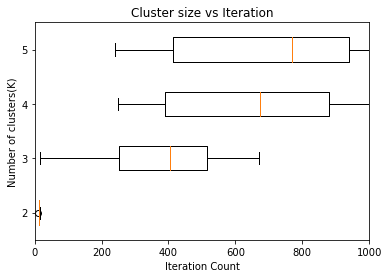

In [43]:
fig, cor = plt.subplots()
col  = [iterator_count[i] for i in cluster_size]

cor.set_title('Cluster size vs Iteration')
cor.boxplot(col,  vert=0)
cor.set_xlim(0, 1000)
plt.yticks([1, 2, 3, 4], cluster_size)
cor.set_ylabel('Number of clusters(K)')
cor.set_xlabel('Iteration Count')
plt.show()

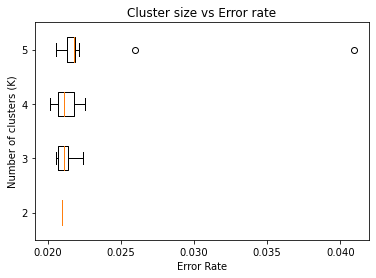

In [45]:
fig, cor = plt.subplots()
cluster_size = [2,3,4,5]
col  = [error_conut[i] for i in cluster_size]

cor.set_title('Cluster size vs Error rate')
cor.boxplot(col,  vert=0)
plt.yticks([1, 2, 3, 4], cluster_size)
cor.set_ylabel('Number of clusters (K)')
cor.set_xlabel('Error Rate')
plt.show()

### Problem 3: Algorithm Design [30pt]


### Problem 3.1 
##### Given a text D and a pattern P, describe an Ω(d+p) time method for finding the longest prefix of P that is a substring of D. The lengths of D and P are d and p, respectively.


    Input: text D and a pattern P
    Output: longest prefix of P that is a substring of D


In [2]:
def fail_table(pattern):

    l=0
    longest_prefix = [0]*len(pattern)

    for i in range(1,len(pattern)):

        if pattern[l] == pattern[i]:
            l+=1
            longest_prefix[i] = l
        else:
            while l>0 and pattern[l-1]!=pattern[i]:
                l=l-1
            longest_prefix[i] = l
    
    return longest_prefix

In [3]:
def kmp(pattern,text):

    i = 0
    j = 0
    k = len(pattern)
    max_prefix_len = 0
    
    longest_prefix=fail_table(pattern)
    
    while i<len(text):
        if pattern[j] == text[i]:
            i+=1
            j+=1
            max_prefix_len=max(max_prefix_len,j)
        else:
            while j>0 and pattern[j]!=text[i]:                
                j=longest_prefix[j-1]
            
            if pattern[j]!=text[i] and j==0:                
                i+=1
        
        if j==k:
            return pattern[:k]    # return if whole string matches
    
    return pattern[:max_prefix_len]

In [4]:
P="pattpatepspa" 
D="A simple patt in ptrn" 

print("Fail Table - ",fail_table(P))

result = kmp(P,D)
print("Longest prefix of P that is a substring of D =>", result)

Fail Table -  [0, 0, 0, 0, 1, 2, 3, 0, 1, 0, 1, 2]
Longest prefix of P that is a substring of D => patt


### Explanation -
KMP runs in O(d+p) time for pattern searching. While comparing, we return the maximum prefix length that is matched and thus this algorithm runs in O(d+p) time too.

### Problem 3.2
#### X, Y, and Z are three arrays and each has m elements. For an arbitrary integer t, describe O(m2logm)-time algorithm to determine if there exist numbers, x in X, y in Y, and z in Z, such that t = x+y+z.


def binarySearch(arr, x, l, r):

    if r >= l:
        mid = l + (r - l) // 2
 
        # If element is present at the middle itself
        if arr[mid] == x:
            return mid
        
        # If element is smaller than mid, then it
        # can only be present in left subarray
        elif arr[mid] > x:
            return binarySearch(arr, l, mid-1, x)
        
        # Else the element can only be present
        # in right subarray
        else:
            return binarySearch(arr, mid + 1, r, x)
    
    else:
        # Element is not present in the array
        return -1

##### Reference - https://www.geeksforgeeks.org/binary-search/

Algorithm:

    Input: three arrays X,Y,Z of size m and integer T
    Output: True if t=x+y+z exists in X,Y,Z else False

    Sort Z     // Sorting for binary search - mlogm

    for x in X:
        for y in Y:    // m^2 time
            to_search = t-x-y

            isPresent = binarySearch(Z, to_search, 0, len(Z)-1)    // logm time

            if(isPresent)
                return True

    return False
    
    
##### Here the two for loops runs in O(m^2) time and the binary search takes logm time. The sorting algorithm runs in O(mlogm).
##### Thus, overall the total time complexity is O(mlogm + m^2.logm) = O(m^2.logm)

### Problem 3.3
##### Describe an efficient algorithm for deleting a string from a compressed trie and analyze its running time.

    ALPHABET_SIZE = 26
    // trie node
    class TrieNode
    {
        constructor()
        {
            this.children=[NULL]*ALPHABET_SIZE
            this.wordCount=0
        }
    }
    
    
Algorithm: CompressedTrieStringDelete(T, s)

    Input: A compressed trie T and a string s
    Output: T without s 
    
    search the compressed trie for s

    if s is not found then
        return False     // string is not present
    else
        let U be the node where s was found

        if s is not equal to the whole string ended at U (wordCount=0) or U has a child
            return False    // we cannot delete an internal node

        let P be the parent of U

        delete u 
        if P has a child C then
            // P.string denotes the string stored at a node P
            P.string ← P.string + C.string
            delete node C    // merge P and C into a single node

        return True     // successful deletion

Reference - https://www.coursehero.com/file/po3atj/Zubair-Shaikh-CS-600-WS-10444383-C-2311-Give-an-efficient-algorithm-for/


##### Time complexity for deletion is dependent upon search time. 
##### Here, the search time complexity is O(key_length) wher key_length is the length of the string to be searched and is the dominant term. Deletion will take O(1) time as it contains changing or removing the links with the parent node only.